#### SuperStore Data Analysis Project

##### Dataset is taken from: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final


In [1]:
# Library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
store_data = pd.read_csv(r'Sample_Superstore.csv', encoding='windows-1252')

In [4]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
store_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
store_data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
store_data.duplicated().sum()

0

In [11]:
# Types of Customers

types_of_customers = store_data['Segment'].unique()
types_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [14]:
number_of_customers = store_data['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'CustomerType'})

In [15]:
number_of_customers

,CustomerType,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


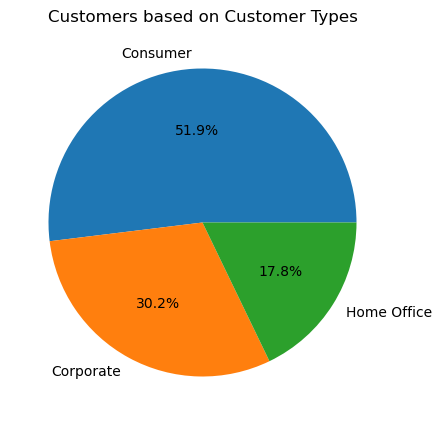

In [22]:
plt.figure(figsize=(15,5))
plt.pie(number_of_customers['count'], labels=number_of_customers['CustomerType'], autopct='%1.1f%%')
plt.title('Customers based on Customer Types')
plt.show()

##### From the pie chart, we can see that general consumers made up of more than 50% of all customers. The lowest number of customers are from the home office.

In [27]:
# Total sales for each customer type

sales_per_type = store_data.groupby(['Segment'])['Sales'].sum().reset_index().rename(columns={'Segment':'CustomerType','Sales':'TotalSales'})
sales_per_type

,CustomerType,TotalSales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


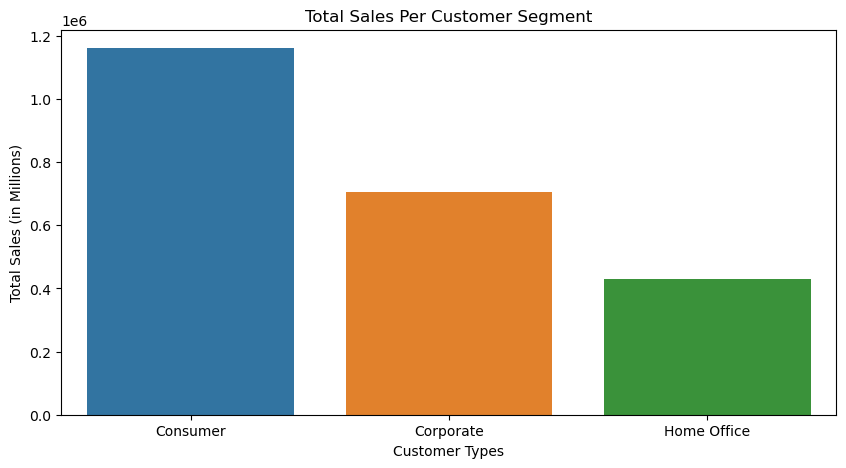

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(data=sales_per_type,x='CustomerType',y='TotalSales')
plt.xlabel('Customer Types')
plt.ylabel('Total Sales (in Millions)')
plt.title('Total Sales Per Customer Segment')
plt.show()

In [48]:
# Calculating Customer LifeTime Value - CLTV

customer_order_frequency = store_data.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

- We can get how many orders each customer make by grouping customer info and counting the order id for each customer. 

- We don't use value_counts() here as it will only count the number of occurrences for each unique 'Order ID' for each customer and not the count of Order IDs in general. We cannot use Sum() as well since it will only concatenates Order IDs as they are strings.

- Therefore, we will use count(). 

In [49]:
customer_order_frequency

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [50]:
repeating_customers = customer_order_frequency[customer_order_frequency['Total Orders'] > 1]

In [51]:
repeating_customers_sorted = repeating_customers.sort_values(by='Total Orders', ascending=False)

- Top 12 repeating customers

In [56]:
repeating_customers_sorted.head(12).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,37
1,MA-17560,Matt Abelman,Home Office,34
2,JL-15835,John Lee,Consumer,34
3,PP-18955,Paul Prost,Home Office,34
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,EH-13765,Edward Hooks,Corporate,32
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


In [57]:
top12 = repeating_customers_sorted.head(12).reset_index(drop=True)

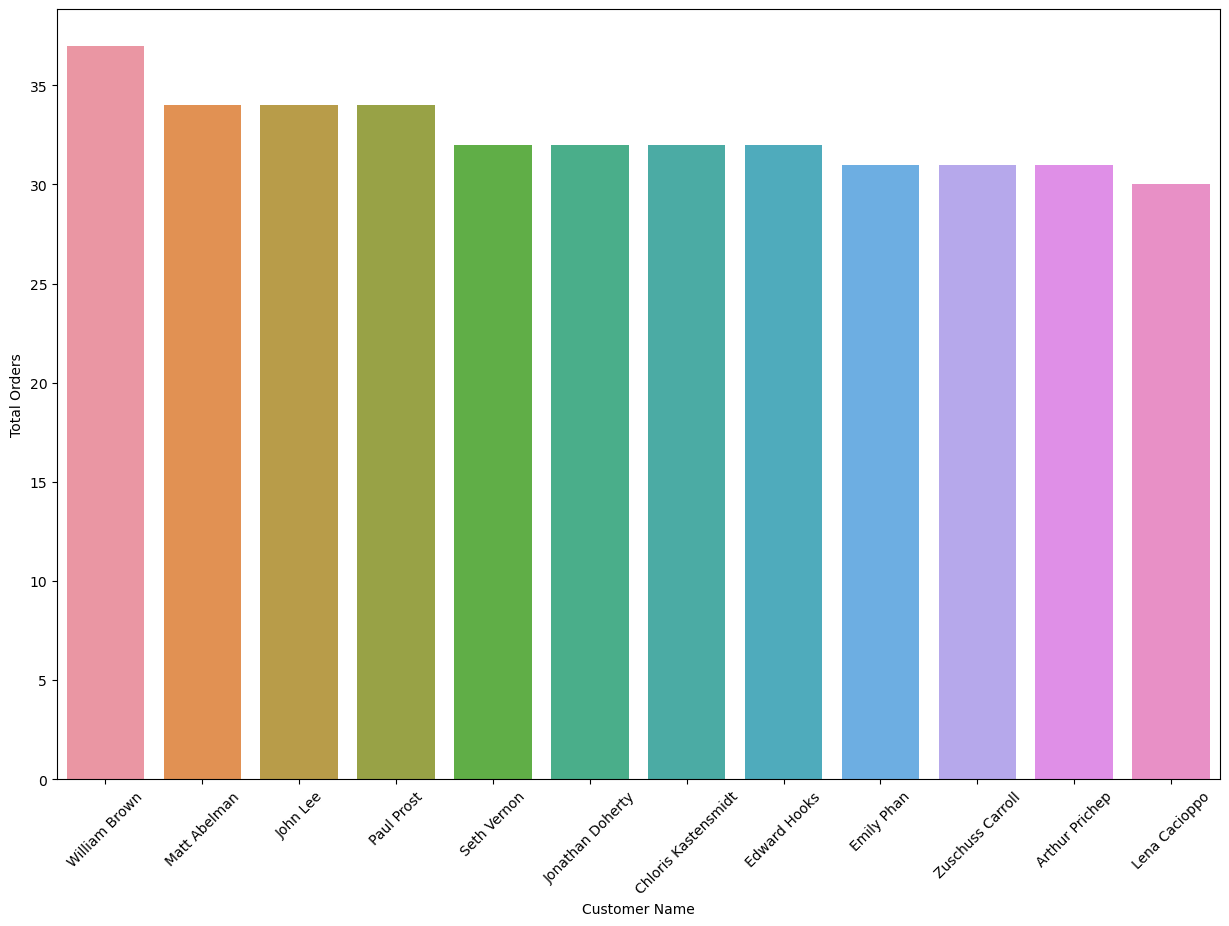

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(data=top12, x='Customer Name', y='Total Orders')
plt.xticks(rotation=45)
plt.show()

In [72]:
customer_sales = store_data.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()
customer_sales.rename(columns={'Sales': 'Total Sales'}, inplace=True)

In [73]:
top_spenders = customer_sales.sort_values(by='Total Sales', ascending=False).head(12).reset_index(drop=True)

In [74]:
top_spenders

,Customer ID,Customer Name,Segment,Total Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


In [83]:
shipping_models = store_data['Ship Mode'].value_counts().reset_index()
shipping_models.rename(columns={'count': 'Use Count'}, inplace=True)

In [84]:
shipping_models

,Ship Mode,Use Count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


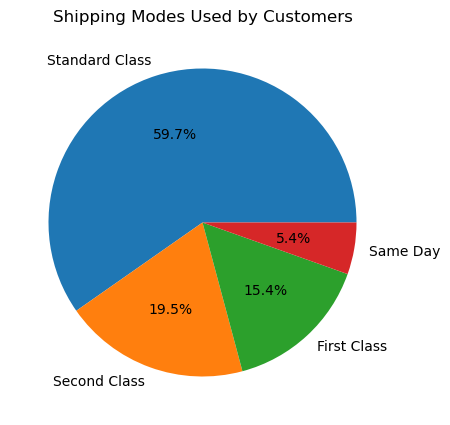

In [85]:
modes = shipping_models['Ship Mode'].unique()
plt.figure(figsize=(15,5))
plt.pie(shipping_models['Use Count'], labels=modes, autopct='%1.1f%%')
plt.title('Shipping Modes Used by Customers')
plt.show()

In [94]:
ship_mode_per_segment = store_data.groupby(['Segment'])['Ship Mode'].value_counts().reset_index().rename(columns={'count':'Count'})

In [95]:
ship_mode_per_segment

,Segment,Ship Mode,Count
0,Consumer,Standard Class,3085
1,Consumer,Second Class,1020
2,Consumer,First Class,769
3,Consumer,Same Day,317
4,Corporate,Standard Class,1812
5,Corporate,Second Class,609
6,Corporate,First Class,485
7,Corporate,Same Day,114
8,Home Office,Standard Class,1071
9,Home Office,Second Class,316


<Figure size 1500x1000 with 0 Axes>

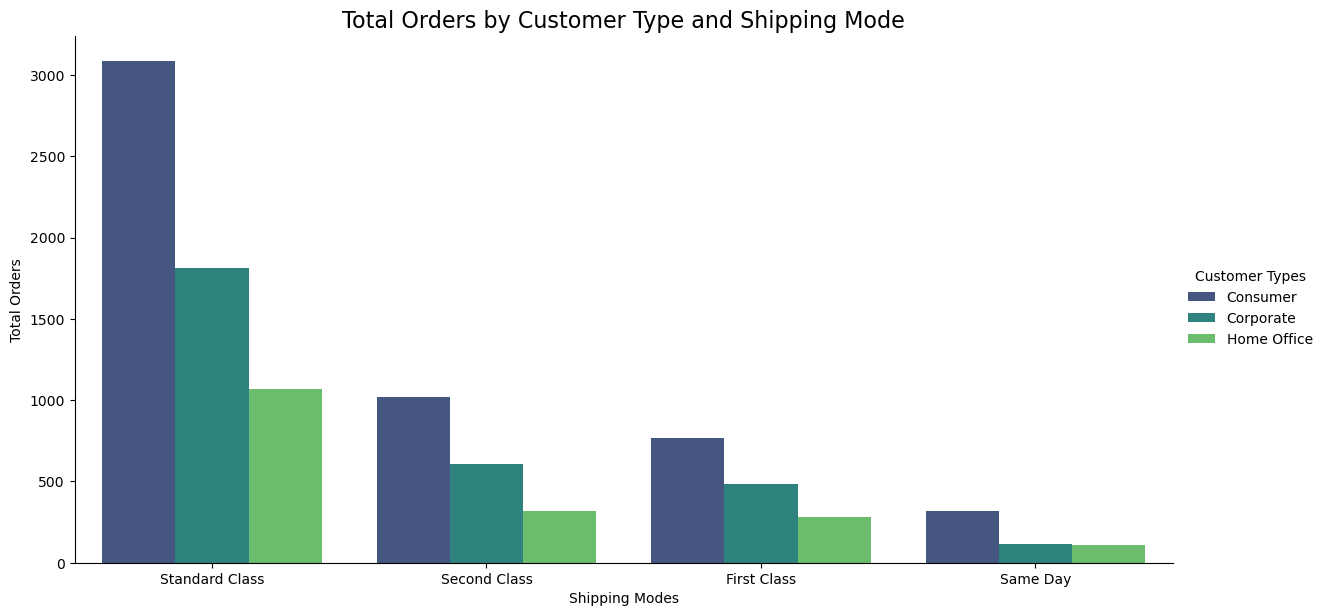

In [131]:
from turtle import title


plt.figure(figsize=(15,10))
#  Set up the seaborn catplot
g = sns.catplot(
    data=ship_mode_per_segment, kind="bar", x="Ship Mode",  y="Count", hue="Segment", errorbar=None,  palette="viridis",  height=6, 
    aspect=2 )

# Add labels and title
g._legend.set_title("Customer Types") #Updating the hue for sns catplot, replacing "Segment"
plt.xlabel("Shipping Modes")
plt.ylabel("Total Orders")
plt.title('Total Orders by Customer Type and Shipping Mode', fontsize=16)

# Show the plot
plt.show()

In [99]:
customers_per_state = store_data['State'].value_counts().reset_index().rename(columns={'count':'Number of Customers'})

In [101]:
customers_per_state.head(20)

,State,Number of Customers
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [107]:
customers_per_city = store_data.groupby('State')['City'].value_counts().reset_index().rename(columns={'count':'Number of Customers'})
customers_per_city.sort_values(by='Number of Customers',ascending=False).head(20)

,State,City,Number of Customers
380,New York,New York City,915
30,California,Los Angeles,747
458,Pennsylvania,Philadelphia,537
31,California,San Francisco,510
572,Washington,Seattle,428
494,Texas,Houston,377
194,Illinois,Chicago,314
32,California,San Diego,170
495,Texas,Dallas,157
418,Ohio,Columbus,120


In [111]:
sales_per_state = store_data.groupby('State')['Sales'].sum().reset_index().rename(columns={'Sales':'Total Sales'})

In [116]:
sales_per_state.sort_values(by='Total Sales', ascending=False).head(10).reset_index(drop=True)

,State,Total Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140
5,Florida,89473.7080
6,Illinois,80166.1010
7,Ohio,78258.1360
8,Michigan,76269.6140
9,Virginia,70636.7200


In [117]:
sales_per_city = store_data.groupby('City')['Sales'].sum().reset_index().rename(columns={'Sales':'Total Sales'})
sales_per_city.sort_values(by='Total Sales', ascending=False).head(10).reset_index(drop=True)

,City,Total Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420
